In [1]:
!python --version

Python 3.8.5


## 1. Пиксельная маска части изображения
#### Дано:
- изображение (формат jpg/png)
- диапазон строк для маски (y_min, y_max)
- диапазон столбцов для маски (x_min, x_max)
- число разбиений на области (h, например, для h=10 маска разбивается на 10*10=100 равных областей)

#### Требуется:
- написать алгоритм усреднения цвета в каждой области (усреднение по каждому цветовому каналу: R,G,B)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MPL Setup
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('figure', figsize=(9, 9))

In [2]:
img = plt.imread('data/panda.jpg')

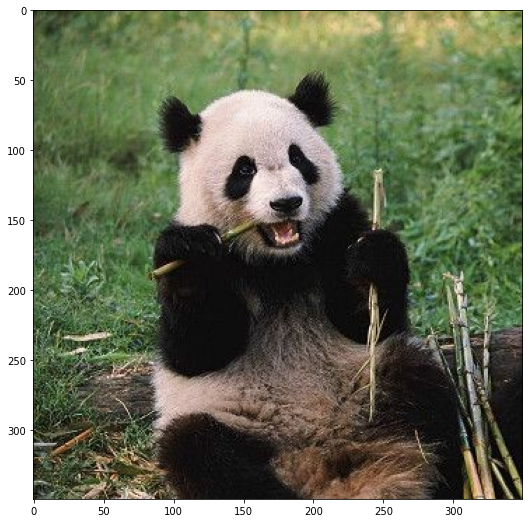

In [3]:
plt.imshow(img)

### 1. Маска по ширине и высоте, размер разбиения определяется по пикселям

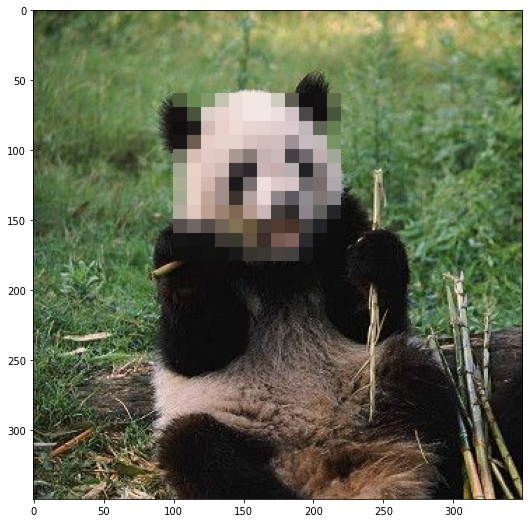

In [13]:
def mask(img, x, y, w, h, size=25):
    """Returns masked image

    Arguments:
    img -- source image
    x, y -- start coordinates of mask
    w, h -- width and height of mask
    size -- pixel size 

    """
    masked_img = img.copy()
    for i in range(y, y+h, size):
        for j in range(x, x+w, size):
            masked_img[i:i+size, j:j+size, 0] = img[i:i+size, j:j+size, 0].mean()
            masked_img[i:i+size, j:j+size, 1] = img[i:i+size, j:j+size, 1].mean()
            masked_img[i:i+size, j:j+size, 2] = img[i:i+size, j:j+size, 2].mean()
    return masked_img
    
plt.imshow(mask(img, 100, 60, 120, 120, 10))

### 2. Маска по начальным и конечным координатам, размер разбиения задается кол-вом частей отрезка

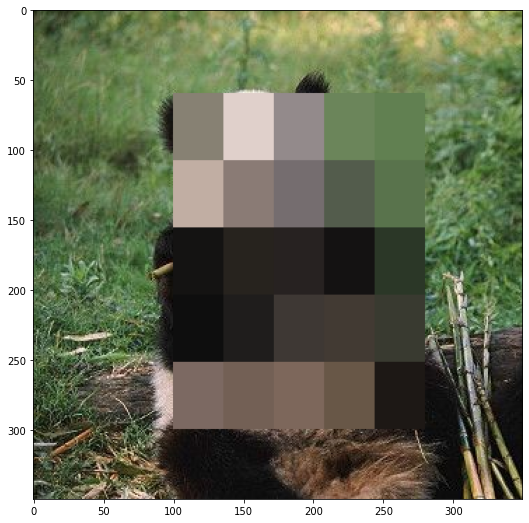

In [8]:
def mask(img, x_min, x_max, y_min, y_max, h=25):
    """Returns masked image

    Arguments:
    img -- source image
    x_min, y_min -- start coordinates of mask
    x_max, y_max -- finish coordinates of mask
    h -- splits count 
    
    Вариант, где h - кол-во разбиений отрезка 
    Пиксели могут не быть квадратными

    """
    masked_img = img.copy()
    x_step = (x_max - x_min)//h # Шаг для оси X
    y_step = (y_max - y_min)//h # Шаг для оси Y
    for i in range(y_min, y_max, y_step):
        for j in range(x_min, x_max, x_step):
            masked_img[i:i+y_step, j:j+x_step, 0] = img[i:i+y_step, j:j+x_step, 0].mean()
            masked_img[i:i+y_step, j:j+x_step, 1] = img[i:i+y_step, j:j+x_step, 1].mean()
            masked_img[i:i+y_step, j:j+x_step, 2] = img[i:i+y_step, j:j+x_step, 2].mean()
    return masked_img
    
plt.imshow(mask(img, 100, 280 ,60, 300, 5))
